In [1]:
from XRDXRFutils.spectra import SpectraXRD
from XRDXRFutils import DataXRD,snip,convolve

from numpy import arange,linspace
from matplotlib.pyplot import plot,subplots,xlim,ylim,hlines,vlines,xlabel,ylabel,imshow,figure,legend

In [2]:
path = '/home/zdenek/Projects/pyMaXRDXRF/M491/ProfiloXRD/'
data = DataXRD().load_h5(path + 'data.h5').calibrate_from_file(path + 'calibration.ini')

Loading: /home/zdenek/Projects/pyMaXRDXRF/M491/ProfiloXRD/data.h5


In [3]:
spectra = SpectraXRD().from_array(data.data[50,50])
spectra_f = SpectraXRD().from_file(path + 'Frame0128.dat')

In [4]:
spectra.opt = [-1185,1950,51]
spectra.theta_range()

array([19.71327181, 53.75981403])

Text(0, 0.5, 'counts')

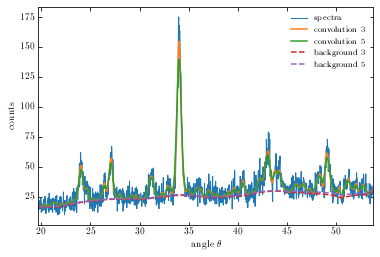

In [5]:
%matplotlib inline
x = spectra.theta
plot(x,spectra.counts,lw=1,label='spectra')

plot(x,convolve(spectra.counts,n=21,std=3),label='convolution 3')
plot(x,convolve(spectra.counts,n=40,std=5),label='convolution 5')

plot(x,spectra.background(n=21,std=3,m=32),'--',label='background 3')
plot(x,spectra.background(n=40,std=5,m=32),'--',label='background 5')

legend(frameon=False)
xlim(x[0],x[-1])
xlabel(r'angle $\theta$')
ylabel(r'counts')

Text(0, 0.5, 'relative intensity')

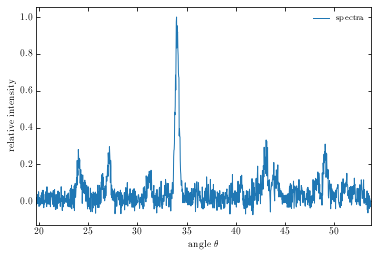

In [6]:
x = spectra.theta
plot(spectra.theta,spectra.intensity,lw=1,label=r'spectra')
xlim(x[0],x[-1])
legend(frameon=False)
xlabel(r'angle $\theta$')
ylabel(r'relative intensity')